In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
modelos = pd.read_csv("/content/drive/MyDrive/R/vehic_modelos.csv")
print(modelos)

        obs  Logistic        NB   RF
0         0  0.177059  0.113069  0.3
1         0  0.186704  0.267571  0.0
2         1  0.421042  0.996786  0.6
3         1  0.323086  0.627315  0.2
4         0  0.066803  0.000036  0.0
...     ...       ...       ...  ...
116572    0  0.171609  0.000123  0.2
116573    0  0.188417  0.145236  0.1
116574    0  0.315723  0.490899  0.1
116575    0  0.146233  0.095667  0.0
116576    0  0.157387  0.102760  0.0

[116577 rows x 4 columns]


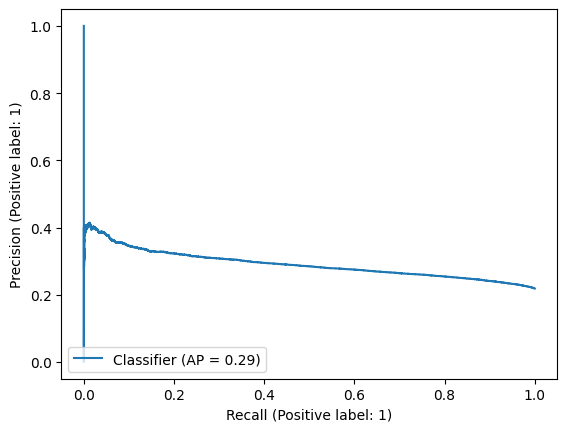

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# X, y = make_classification(random_state=0)
# X_train, X_test, y_train, y_test = train_test_split(
#         X, y, random_state=0)
# clf = LogisticRegression()
# clf.fit(X_train, y_train)
# y_pred = clf.predict_proba(X_test)[:, 1]
PrecisionRecallDisplay.from_predictions(
   modelos.obs, modelos.Logistic )
plt.show()

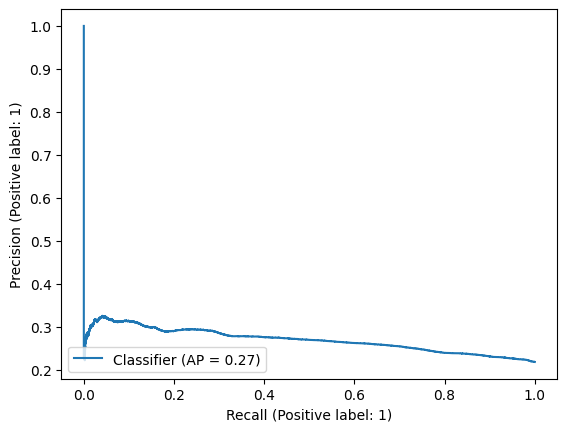

In [4]:
PrecisionRecallDisplay.from_predictions(
   modelos.obs, modelos.NB )
plt.show()

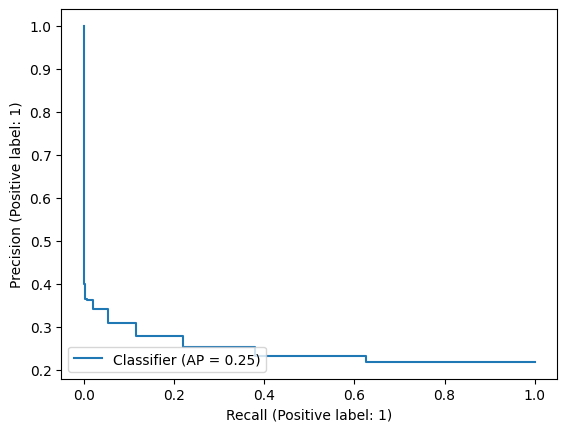

In [5]:
PrecisionRecallDisplay.from_predictions(
   modelos.obs, modelos.RF )
plt.show()

In [6]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc

import pandas as pd
mydata = pd.read_csv("/content/drive/MyDrive/R/mydata.csv")

mydata = mydata.drop('MOBILENO_AVL_FLAG', axis=1)
mydata = mydata.drop('LTV_new', axis=1)
mydata = mydata.drop('PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: More than 50 active Accounts found', axis=1)

X = mydata.drop('LOAN_DEFAULT', axis=1)
y = mydata['LOAN_DEFAULT']

mydata.head(10)


,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE,PRI_ACTIVE_ACCTS,PRI_CURRENT_BALANCE,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,...,PERFORM_CNS_SCORE_DESCRIPTION_J-High Risk,PERFORM_CNS_SCORE_DESCRIPTION_K-High Risk,PERFORM_CNS_SCORE_DESCRIPTION_L-Very High Risk,PERFORM_CNS_SCORE_DESCRIPTION_M-Very High Risk,PERFORM_CNS_SCORE_DESCRIPTION_No Bureau History Available,PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: No Activity seen on the customer (Inactive),PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: No Updates available in last 36 months,PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: Not Enough Info available on the customer,PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: Only a Guarantor,PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: Sufficient History Not Available
0,1,0,0,0,0,-0.855453,-0.535617,-0.176064,-0.091711,-0.094259,...,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0.911822,-0.020549,-0.146773,-0.070599,-0.094259,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,-0.855453,-0.535617,-0.176064,-0.091711,-0.094259,...,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0.045917,-0.535617,-0.176064,-0.091711,-0.094259,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,-0.855453,-0.535617,-0.176064,-0.091711,-0.094259,...,0,0,0,0,1,0,0,0,0,0
5,1,0,0,0,0,1.582678,-0.535617,-0.176064,-0.091711,-0.094259,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,-0.855453,-0.535617,-0.176064,-0.091711,-0.094259,...,0,0,0,0,1,0,0,0,0,0
7,1,0,0,0,0,-0.805212,-0.020549,-0.098720,-0.060379,-0.094259,...,0,0,0,0,0,0,0,1,0,0
8,1,0,0,0,0,1.266459,-0.020549,-0.176107,0.061957,-0.094259,...,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,1.561990,-0.535617,-0.176064,-0.091711,-0.094259,...,0,0,0,0,0,0,0,0,0,0


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y,test_size=0.5, random_state=0)
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
y_pred_log = clf.predict_proba(X_test)[:, 1]


In [8]:
precision_log, recall_log, _ = precision_recall_curve(y_test, y_pred_log)
auc_log = auc(recall_log, precision_log)
auc_log

0.292653704416018

In [9]:
from sklearn.naive_bayes import GaussianNB
X_train, X_test, y_train, y_test = train_test_split(
        X, y,test_size=0.5, random_state=0)
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred_nb = clf.predict_proba(X_test)[:, 1]

In [10]:
precisio_nb, recall_nb, _ = precision_recall_curve(y_test, y_pred_nb)
auc_nb = auc(recall_nb, precisio_nb)
auc_nb

0.2681860551295586

In [11]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(
        X, y,test_size=0.5, random_state=0)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred_rf = clf.predict_proba(X_test)[:, 1]


In [12]:
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_pred_rf)
auc_rf = auc(recall_rf, precision_rf)
auc_rf

0.28190661446849546

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

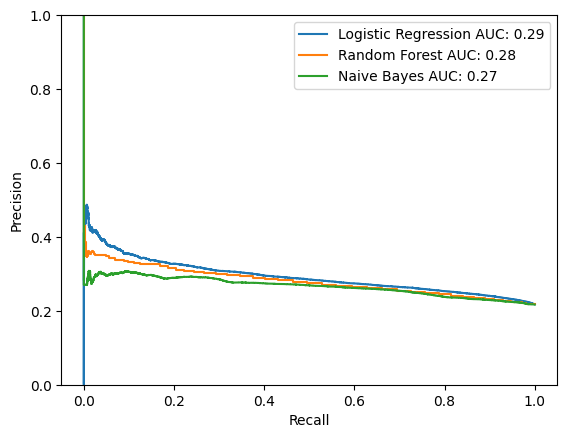

In [16]:
fig, ax = plt.subplots()

PrecisionRecallDisplay.from_predictions(y_test, y_pred_log, ax=ax)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_rf, ax=ax)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_nb, ax=ax)
handles, labels = ax.get_legend_handles_labels()
auc_list = [auc_log,auc_rf, auc_nb ]
labels = ['Logistic Regression AUC: ' + str(round(auc_list[0],2)),
          'Random Forest AUC: '+ str(round(auc_list[1],2)),
          'Naive Bayes AUC: '+ str(round(auc_list[2],2)),]

ax.legend(handles=handles, labels=labels)
# ax.set_title("Precision-recall Chart for class 1")
ax.set_ylim([0.0, 1])
plt.xlabel('Recall')
plt.ylabel('Precision')
from google.colab import files
plt.savefig("Precision_recall_Chart.pdf")
files.download("Precision_recall_Chart.pdf")
plt.show()

In [15]:
from google.colab import files
plt.savefig("Precision_recall_Chart.pdf")
files.download("Precision_recall_Chart.pdf")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>